In [1]:
# from trendln import *
# # this will serve as an example for security or index closing prices, or low and high prices
# import yfinance as yf # requires yfinance - pip install yfinance
# tick = yf.Ticker('BTC-USD') # S&P500
# NUMWIN = 1000
# hist = tick.history(period="max", rounding=True)
# mins, maxs = calc_support_resistance(hist[-NUMWIN:].Close, accuracy=ACCU)
# minimaIdxs, pmin, mintrend, minwindows = calc_support_resistance((hist[-NUMWIN:].Low, None),accuracy=ACCU) #support only
# mins, maxs = calc_support_resistance((hist[-NUMWIN:].Low, hist[-NUMWIN:].High), accuracy=ACCU)
# (minimaIdxs, pmin, mintrend, minwindows), (maximaIdxs, pmax, maxtrend, maxwindows) = mins, maxs

# (minimaIdxs, pmin, mintrend, minwindows), (maximaIdxs, pmax, maxtrend, maxwindows) = \
# 	calc_support_resistance(
# 	# list/numpy ndarray/pandas Series of data as bool/int/float and if not a list also unsigned
# 	# or 2-tuple (support, resistance) where support and resistance are 1-dimensional array-like or one or the other is None
# 	# can calculate only support, only resistance, both for different data, or both for identical data
# 	h,

# 	# METHOD_NAIVE - any local minima or maxima only for a single interval (currently requires pandas)
# 	# METHOD_NAIVECONSEC - any local minima or maxima including those for consecutive constant intervals (currently requires pandas)
# 	# METHOD_NUMDIFF (default) - numerical differentiation determined local minima or maxima (requires findiff)
# 	extmethod = METHOD_NUMDIFF,
	
# 	# METHOD_NCUBED - simple exhuastive 3 point search (slowest)
# 	# METHOD_NSQUREDLOGN (default) - 2 point sorted slope search (fast)
# 	# METHOD_HOUGHPOINTS - Hough line transform optimized for points
# 	# METHOD_HOUGHLINES - image-based Hough line transform (requires scikit-image)
# 	# METHOD_PROBHOUGH - image-based Probabilistic Hough line transform (requires scikit-image)
# 	method=METHOD_NSQUREDLOGN,
	
# 	# window size when searching for trend lines prior to merging together
# 	window=125,
	
# 	# maximum percentage slope standard error
# 	errpct = 0.005,
	
# 	# for all METHOD_*HOUGH*, the smallest unit increment for discretization e.g. cents/pennies 0.01
# 	hough_scale=0.01,
	
# 	# only for METHOD_PROBHOUGH, number of iterations to run
# 	hough_prob_iter=10,
	
# 	# sort by area under wrong side of curve, otherwise sort by slope standard error
# 	sortError=False,
	
# 	# accuracy if using METHOD_NUMDIFF for example 5-point stencil is accuracy=3
# 	accuracy=ACCU)
# # if h is a 2-tuple with one value as None, then a 2-tuple is not returned, but the appropriate tuple instead
# # minimaIdxs - sorted list of indexes to the local minima
# # pmin - [slope, intercept] of average best fit line through all local minima points
# # mintrend - sorted list containing (points, result) for local minima trend lines
# 	# points - list of indexes to points in trend line
# 	# result - (slope, intercept, SSR, slopeErr, interceptErr, areaAvg)
# 		# slope - slope of best fit trend line
# 		# intercept - y-intercept of best fit trend line
# 		# SSR - sum of squares due to regression
# 		# slopeErr - standard error of slope
# 		# interceptErr - standard error of intercept
# 		# areaAvg - Reimann sum area of difference between best fit trend line
# 		#   and actual data points averaged per time unit
# # minwindows - list of windows each containing mintrend for that window

# # maximaIdxs - sorted list of indexes to the local maxima
# # pmax - [slope, intercept] of average best fit line through all local maxima points
# # maxtrend - sorted list containing (points, result) for local maxima trend lines
# 	#see for mintrend above
# # maxwindows - list of windows each containing maxtrend for that window


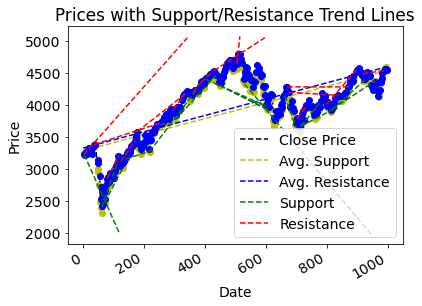

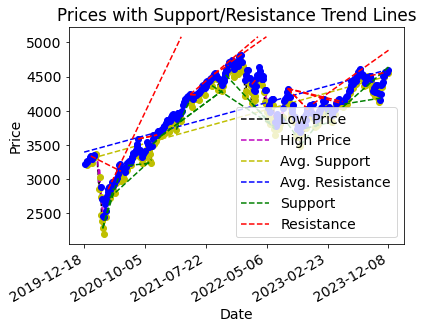

<Figure size 432x288 with 0 Axes>

In [30]:
ACCU=110
import trendln
import matplotlib.pyplot as plt
# this will serve as an example for security or index closing prices, or low and high prices
import yfinance as yf # requires yfinance - pip install yfinance
tick = yf.Ticker('^GSPC') # S&P500
hist = tick.history(period="max", rounding=True)
mins, maxs = trendln.calc_support_resistance(hist[-1000:].Close,accuracy=ACCU)
minimaIdxs, pmin, mintrend, minwindows = trendln.calc_support_resistance((hist[-1000:].Low, None),accuracy=ACCU) #support only
mins, maxs = trendln.calc_support_resistance((hist[-1000:].Low, hist[-1000:].High),accuracy=ACCU)
(minimaIdxs, pmin, mintrend, minwindows), (maximaIdxs, pmax, maxtrend, maxwindows) = mins, maxs
minimaIdxs, maximaIdxs = trendln.get_extrema(hist[-1000:].Close,accuracy=ACCU)
maximaIdxs = trendln.get_extrema((None, hist[-1000:].High),accuracy=ACCU) #maxima only
minimaIdxs, maximaIdxs = trendln.get_extrema((hist[-1000:].Low, hist[-1000:].High),accuracy=ACCU)
fig = trendln.plot_support_resistance(hist[-1000:].Close,accuracy=ACCU) # requires matplotlib - pip install matplotlib
plt.savefig('suppres.svg', format='svg')
plt.show()
plt.clf() #clear figure
fig = trendln.plot_sup_res_date((hist[-1000:].Low, hist[-1000:].High), hist[-1000:].index,accuracy=ACCU) #requires pandas
plt.savefig('suppres.svg', format='svg')
plt.show()
plt.clf() #clear figure
curdir = '.'
# trendln.plot_sup_res_learn(curdir, hist)